## OpenCV Image Processing

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
img1 = cv2.imread('DATA/dog_backpack.png')
img2 = cv2.imread('DATA/watermark_no_copy.png')

When reading from cv2.imread, The images are imported as BGR so use <br>
**cv2.cvtColor(img, cv2.COLOR_BGR2RGB)** to convert to RBG to use plt.imshow

In [3]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

## <ins>Resizing </ins> 
img1 =cv2.resize(img1,(x,y)) ----------- width, height

In [4]:
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))

### Blending the Image

Blending images with same shape:

$$  img1 * \alpha  + img2 * \beta  + \gamma $$

**cv2.addWeighted()**

In [5]:
blended = cv2.addWeighted(src1=img1,alpha=0.9,src2=img2,beta=0.1,gamma=0)

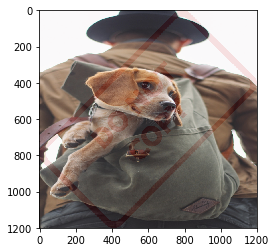

In [6]:
plt.imshow(blended)

---
### Overlaying Images of Different Sizes

In [7]:
img1 = cv2.imread('DATA/dog_backpack.png')
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

large_img = img1
small_img = img2

In [8]:
x_offset=0
y_offset=0

In [9]:
x_end = x_offset+small_img.shape[1]
y_end = y_offset+small_img.shape[0]

In [10]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

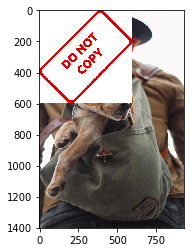

In [11]:
plt.imshow(large_img)

### Creating a Mask

In [12]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
mask_inv = cv2.bitwise_not(img2gray)

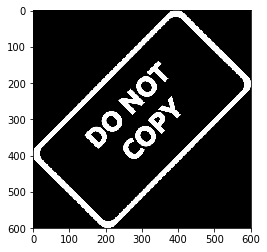

In [13]:
plt.imshow(mask_inv,cmap='gray')

In [14]:
#Converting to 3 channel
white_background = np.full(img2.shape, 255, dtype=np.uint8)

---

## Image Thresholding

In [15]:
img = cv2.imread('DATA/rainbow.jpg',0)  # put 0 to import as grayscale

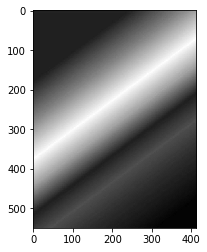

In [16]:
plt.imshow(img,cmap='gray')

### Simple Thresholding 

In [17]:
#Binary
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#Binary Inverse
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# Truncation
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
#Threshold to zero
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
#Threshold to zero Inverse
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

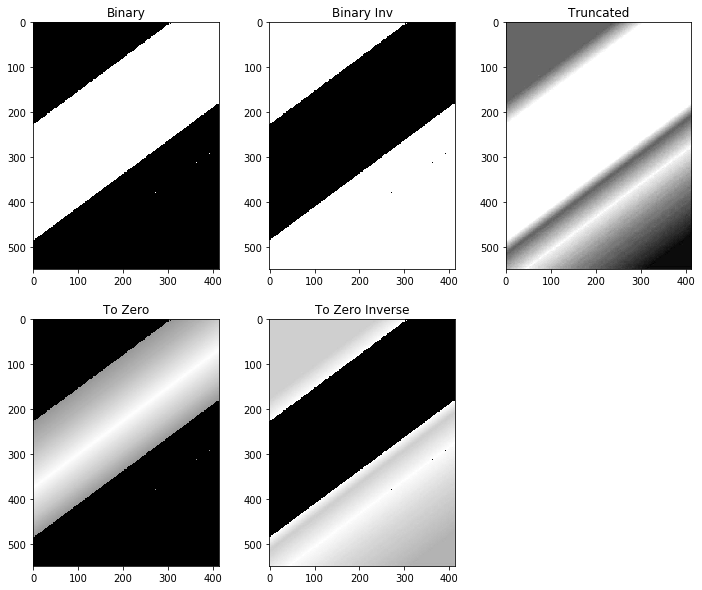

In [18]:

fig = plt.figure(figsize=(12,10))
plt.subplot(2,3,1),plt.imshow(thresh1,cmap = 'gray'),plt.title('Binary')
plt.subplot(2,3,2),plt.imshow(thresh2,cmap = 'gray'),plt.title('Binary Inv')
plt.subplot(2,3,3),plt.imshow(thresh3,cmap = 'gray'),plt.title('Truncated')
plt.subplot(2,3,4),plt.imshow(thresh4,cmap = 'gray'),plt.title('To Zero')
plt.subplot(2,3,5),plt.imshow(thresh5,cmap = 'gray'),plt.title('To Zero Inverse')
plt.show()

In [19]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

### Adaptive Threshold

cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst

**src** – Source 8-bit single-channel image. <br>
**dst** – Destination image of the same size and the same type as src.
**maxValue** – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.<br>
**adaptiveMethod** – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.<br>
**thresholdType** – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .<br>
**blockSize** – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.<br>
**C** – Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.<br>

In [21]:
img = cv2.imread("DATA/crossword.jpg",0)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8) 

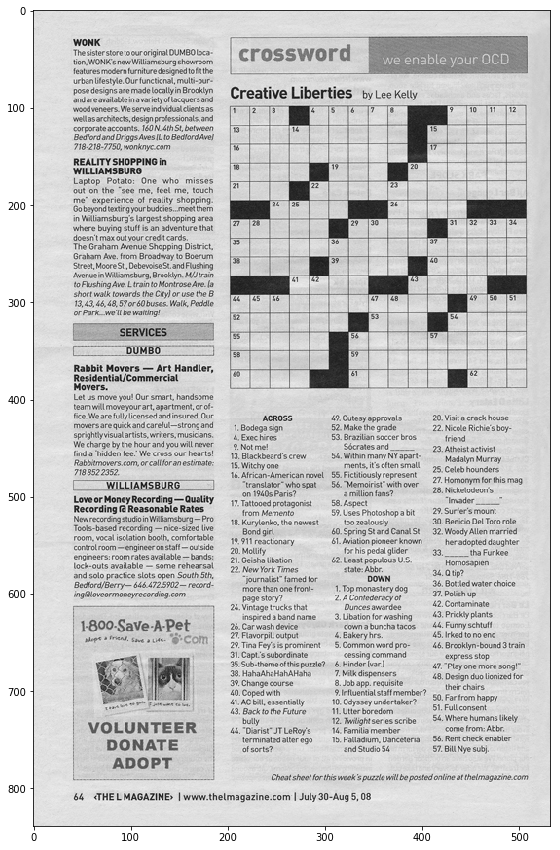

In [22]:
show_pic(img)

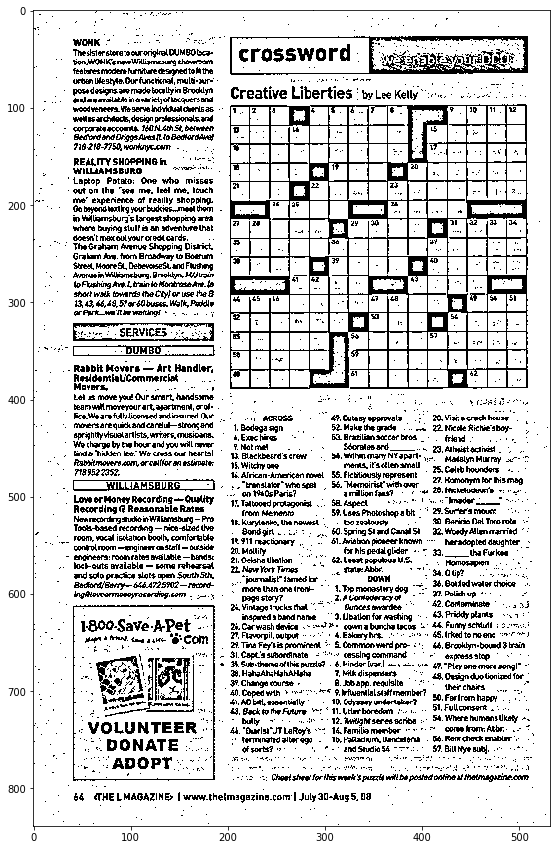

In [23]:
show_pic(th2)

---

## Blurring and Smooting

In [27]:
def load_img():
    img = cv2.imread('DATA/bricks.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(img,text='bricks',org=(10,600), fontFace=font,fontScale= 10,color=(255,0,0),thickness=4)
    return img
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


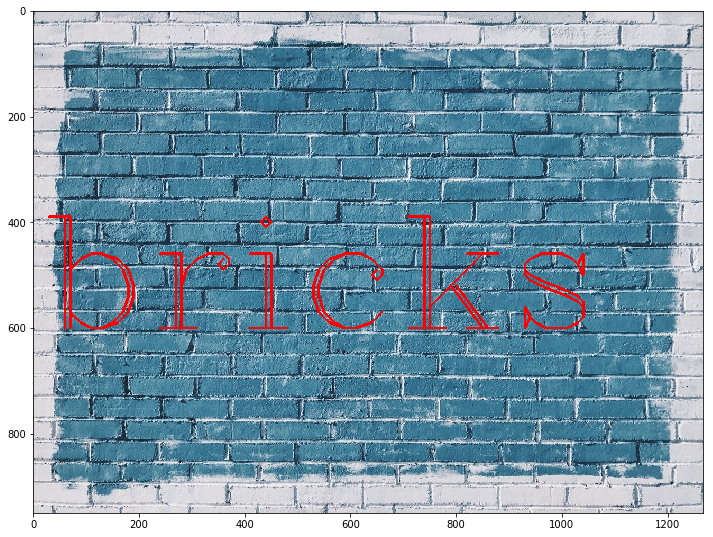

In [28]:
img = load_img()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(img)

### Gamma Correction : Practical Effect of Increasing Brightness

Low gamma = brighter image
High gamma = darker image

**np.power(image,gamma_value)**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 864x720 with 0 Axes>

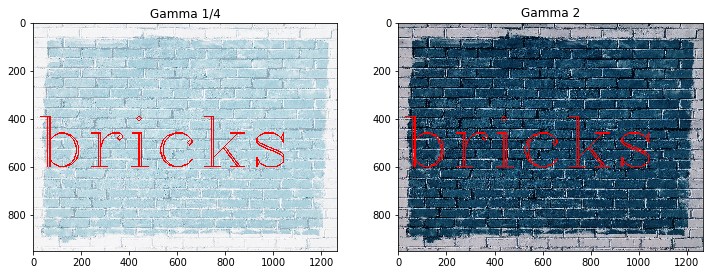

In [29]:
fig = plt.figure(figsize=(12,10))


gamma_effect1 = np.power(img,1/4)

gamma_effect2 = np.power(img,2)

fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1),plt.imshow(gamma_effect1,cmap = 'gray'),plt.title('Gamma 1/4')
plt.subplot(2,2,2),plt.imshow(gamma_effect2,cmap = 'gray'),plt.title('Gamma 2')

plt.show()


## Low Pass filter with convolution
cv2.filter2D(img,-1,kernel)

In [30]:
img = load_img()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


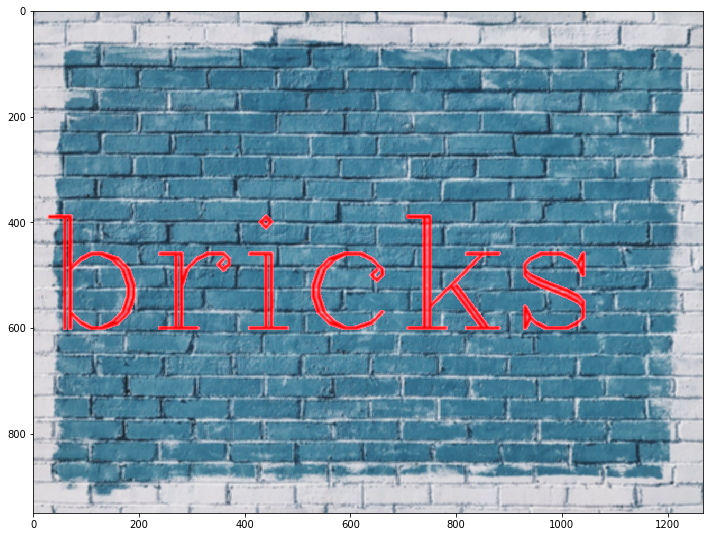

In [34]:
kernel = np.ones(shape=(5,5),dtype=np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
display_img(dst)

---

## Blurring

**Gaussian Blurring** - cv2.GaussianBlur(img,(k,k),SigmaX) # SigmaX is std in X direction. SigmaY is calculated 

**Median Blurring** - cv2.medianBlur(img,5)
Median Blur helps in Noise Reduction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


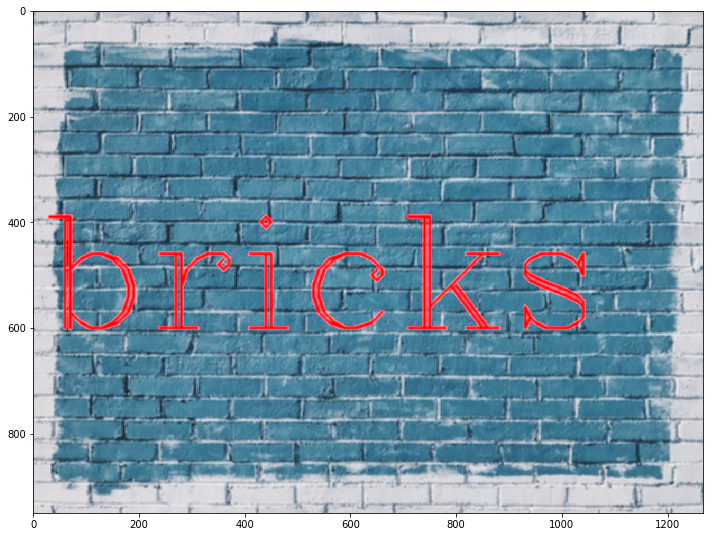

In [35]:
blurred_img = cv2.GaussianBlur(img,(5,5),10)
display_img(blurred_img)

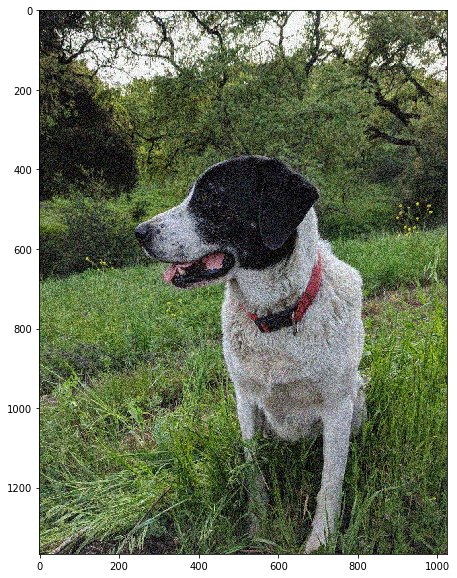

In [36]:
noise_img = cv2.imread('../DATA/sammy_noise.jpg')
display_img(noise_img)

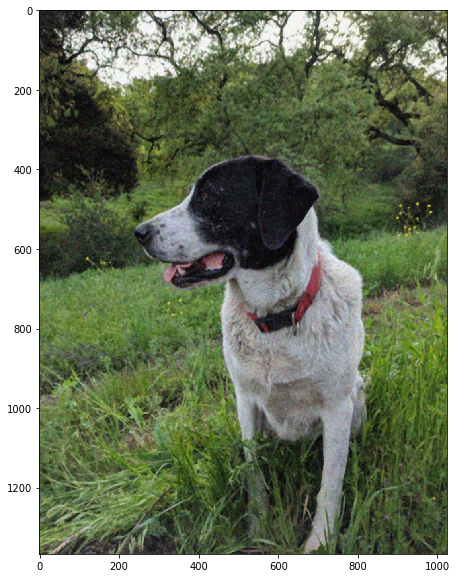

In [37]:
median = cv2.medianBlur(noise_img,5)
display_img(median)

---
### Bilateral Filtering
Highly effective at noise removal while preserving edges

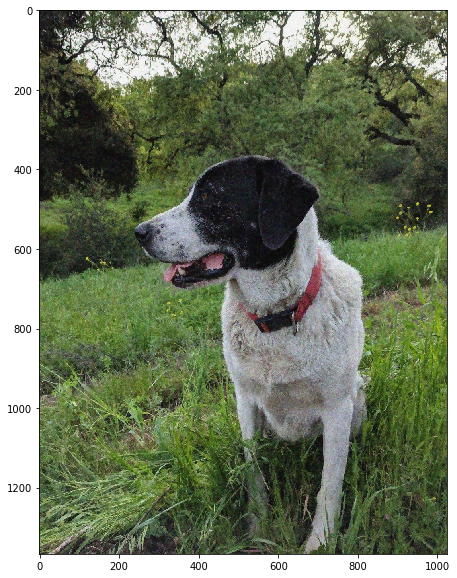

In [38]:
blur = cv2.bilateralFilter(noise_img,9,75,75)
display_img(blur)

---

## Morphological Operation

In image processing the term morphology deals with developing tools for extracting Form and Structure of image regions <br>
The structuring element is sized 3×3 and has its origin at the center pixel

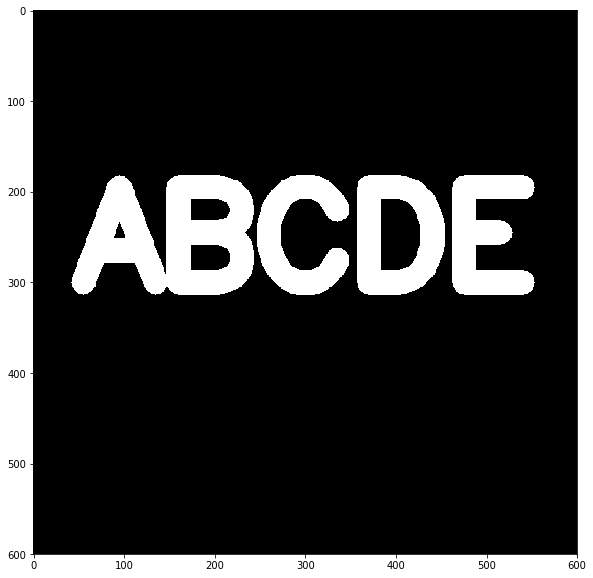

In [39]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    
img = load_img()
display_img(img)

## Erosion
Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

<Figure size 864x720 with 0 Axes>

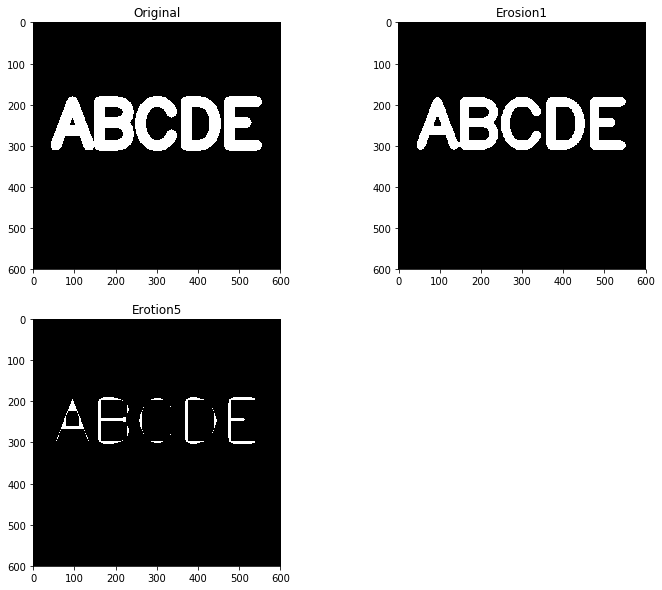

In [77]:
fig = plt.figure(figsize=(12,10))
############################################################
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations = 1)
erosion5 = cv2.erode(img,kernel,iterations = 5) 
############################################################
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray'),plt.title('Original')
plt.subplot(2,2,2),plt.imshow(erosion1,cmap = 'gray'),plt.title('Erosion1')
plt.subplot(2,2,3),plt.imshow(erosion5,cmap = 'gray'),plt.title('Erosion5')
plt.show()

# Dilation

Increases the white region in the image or size of foreground object increases. 

<Figure size 864x720 with 0 Axes>

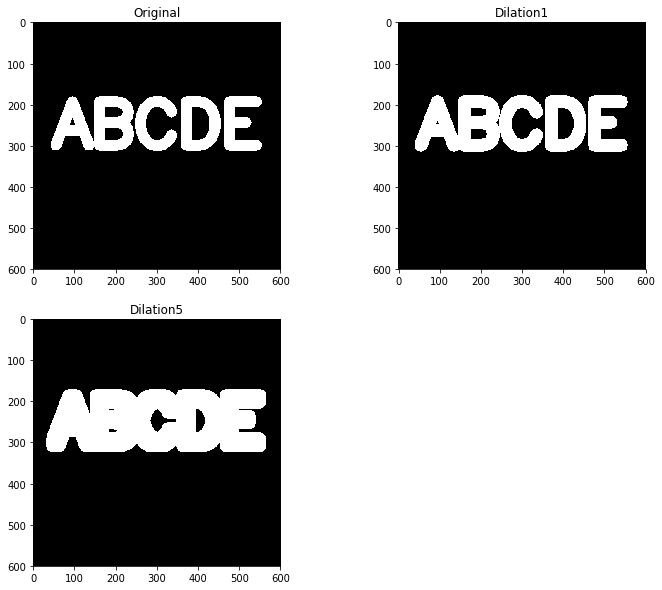

In [76]:
fig = plt.figure(figsize=(12,10))
############################################################
dilation1 = cv2.dilate(img,kernel,iterations = 1)
dilation5 = cv2.dilate(img,kernel,iterations = 5)
############################################################
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray'),plt.title('Original')
plt.subplot(2,2,2),plt.imshow(dilation1,cmap = 'gray'),plt.title('Dilation1')
plt.subplot(2,2,3),plt.imshow(dilation5,cmap = 'gray'),plt.title('Dilation5')
plt.show()

# Opening 
Opening is just another name of **Erosion followed by Dilation**. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx() <br>

Useful in removing background noise!

# Closing
Closing is reverse of Opening, **Dilation followed by Erosion**. It is useful in closing small holes inside the foreground objects, or small black points on the object.

Useful in removing noise from foreground objects, such as black dots on top of the white text.

**cv2.morphologyEx(img, cv2.MORPH_OPEN/cv2.MORPH_CLOSE, kernel)**

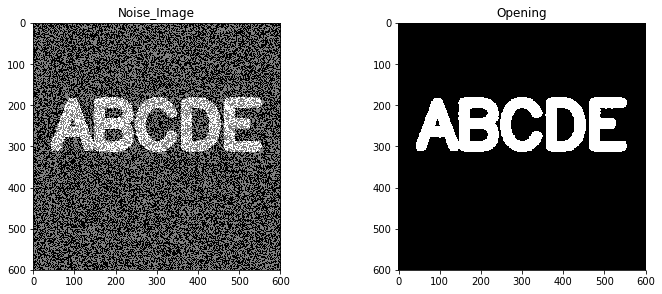

In [74]:
################# Opening ################################
img = load_img()
white_noise = np.random.randint(low=0,high=2,size=(600,600))
white_noise = white_noise*255
noise_img = white_noise+img
fig = plt.figure(figsize=(12,10))

############################################################
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
############################################################

plt.subplot(2,2,1),plt.imshow(noise_img,cmap = 'gray'),plt.title('Noise_Image')
plt.subplot(2,2,2),plt.imshow(opening,cmap = 'gray'),plt.title('Opening')
plt.show()

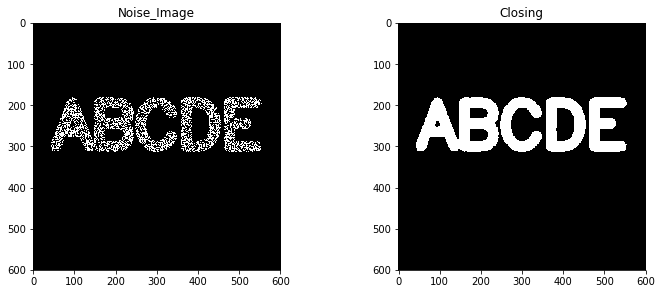

In [70]:
img = load_img()
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise= black_noise * -255
black_noise_img = img + black_noise
black_noise_img[black_noise_img==-255] = 0


#######################################
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
#######################################
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1),plt.imshow(black_noise_img,cmap = 'gray'),plt.title('Noise_Image')
plt.subplot(2,2,2),plt.imshow(closing,cmap = 'gray'),plt.title('Closing')
plt.show()

---

## Morphological Gradient
It is the difference between dilation and erosion of an image.
cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

In [65]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

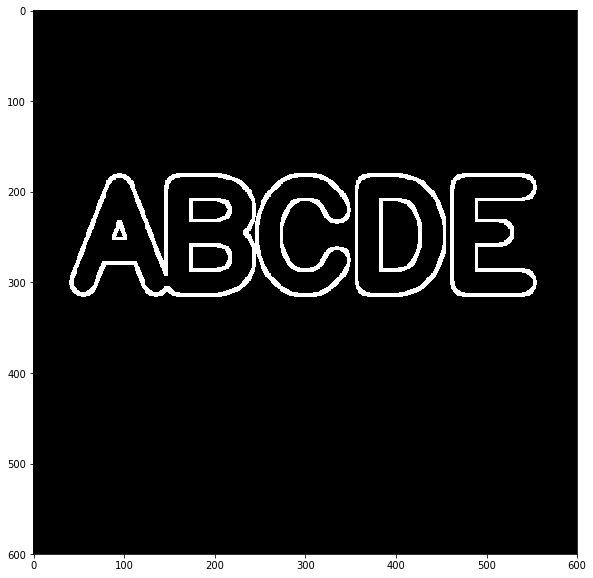

In [66]:
display_img(gradient)